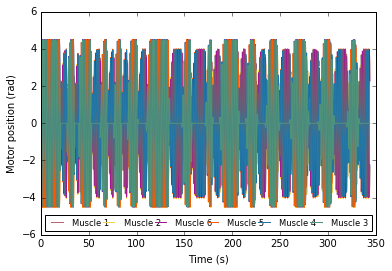

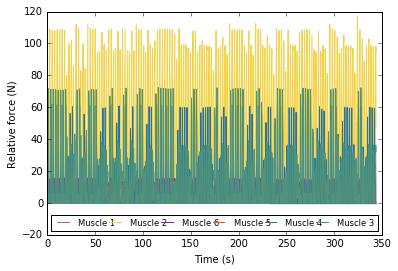

'\n# to plot in frequency domain\nx = np.linspace(0,50,time.size)\nvel1_freq = np.fft.fft(vel[:,1])\nplt.plot(x,np.abs(vel1_freq))\n'

In [2]:
#########################################################################################
### Note: ###############################################################################
### For collecting plots, do not change the size of the window when saving the image. ###
### The image dimensions look ok in LaTeX. Keep this consistent. ########################
### Save the image as svg. Then save it as eps in inkscape. Having the svg ##############
### file allows for the plot sizes to be modified in the future if desired. #############
#########################################################################################

import sys
import rosbag
import matplotlib.pyplot as plt
import numpy as np
#from scipy import signal
from matplotlib.font_manager import FontProperties

def getFigsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

# constants
filename = "/home/roboy/dep_data/data/ramps_fs_sd/ramps_fs_sd_dur_2017-09-11-23-49-01.bag"
position_to_rads = 2.0*3.14159/(2000.0*53.0);
displacement_to_N = 0.237536
#blue, red, green, yellow, magenta, orange, yellow, pink, lightGreen, darkRed, blue, red, green , yellow, magenta
color_pallette = ['#2274A5', '#B4656F', '#4E937A', '#F3D34A', '#A11692', '#F75C03', '#F1C40F', '#D90368', '#00CC66', '#540B0E', '#2274A5', '#B4656F', '#4E937A', '#F3D34A']
motor_to_muscle = [0, 1, 0, 2, 6, 5, 0, 0, 0, 0, 4, 0, 3, 0]

# data variables
time = []
pos = []
force = []

# read data from bag
bag = rosbag.Bag(filename)
for topic, msg, t in bag.read_messages(topics=["/roboy/middleware/MotorStatus"]):
    pos.append(msg.position)
    force.append(msg.displacement)
    time.append(t.to_sec())
bag.close()

# convert to numpy arrays for convenience
time = np.array(time)
time = time-time[0]
pos = np.array(pos)*position_to_rads
force = np.array(force)*displacement_to_N

# add data to plots
for motor in range(pos[0,:].size):
	if sum(pos[:,motor]) == 0:
		#print "Motor "+str(motor)+" not connected\n"
		continue
	plt.figure(1)
	plt.plot(time,pos[:,motor],color=color_pallette[motor], linewidth=1.0, label="Muscle "+str(motor_to_muscle[motor]))
	plt.figure(2)
	plt.plot(time,force[:,motor],color=color_pallette[motor], linewidth=1.0, label="Muscle "+str(motor_to_muscle[motor]))

# configure plots
fontP = FontProperties()
fontP.set_size('small')
plt.figure(1)
plt.ylabel("Motor position (rad)")
plt.xlabel("Time (s)")
plt.legend(loc="lower center", mode="expand", ncol=6, prop=fontP)
plt.figure(2)
plt.ylabel("Relative force (N)")
plt.xlabel("Time (s)")
plt.legend(loc="lower center", mode="expand", ncol=6, prop=fontP)
plt.show()

'''
for motor in range(pos[0,:].size):
	# 4th order butterworth filter with 10 hz cutoff
	b, a = signal.butter(4, 0.2, 'low')
	y_filt = signal.lfilter(b,a,vel[:,motor])
	plt.plot(time,y_filt,color=color_pallette[motor], linewidth=2.0)
plt.show()
'''

'''
# moving average filter
for motor in range(vel[0,:].size):
	y_smooth = []
	buff = []
	for y in vel[:,motor]:
	    buff.append(y)
	    y_smooth.append(np.mean(buff))
	    if len(buff)>10:
	        buff.pop(0)
	plt.plot(time,y_smooth)
plt.show()
'''

'''
# directly filtering requencies above 10 hz
vel1_filt = np.array([])
for motor in range(vel[0,:].size):
	vel1_freq = np.fft.fft(vel[:,motor])
	vel1_freq[vel1_freq.size*10/50:-vel1_freq.size*10/50] = 0
	vel1_filt = np.fft.ifft(vel1_freq)
	plt.plot(time,vel1_filt,color=color_pallette[motor], linewidth=3.0)
plt.show()
'''


'''
# to plot in frequency domain
x = np.linspace(0,50,time.size)
vel1_freq = np.fft.fft(vel[:,1])
plt.plot(x,np.abs(vel1_freq))
'''

In [13]:
t_ = []
bag = rosbag.Bag(filename)
for topic, msg, t in bag.read_messages(topics=["/roboy/middleware/MotorStatus","/roboy_dep/depLoadMatrix"]):
    if topic == "/roboy/middleware/MotorStatus":
        t_.append(0)
    else:
        t_[-1] = 1
bag.close()
t_ = np.array(t_)

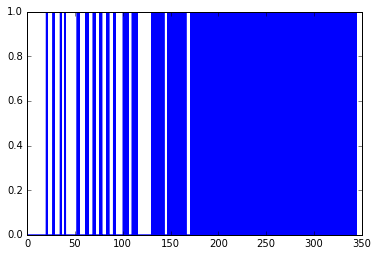

In [14]:
plt.figure(1)
plt.plot(time,t_)
plt.show()